# Titanic Survivals Chances 
### Abstract
This is a tentative data analysis to determine a set of features of passengers that have survived in Titanic disaster. As per my data analysis, the features of passengers for high probability of survival are   

1) being a female, and    
2) under the age of 40, and either  
3) passenger of class type 1 (or),  
4) embarked at station C    

Points 1 and 2 are correlated to empathy factor, while points 3, and 4 are correlated to economic-class factor. The actual casuality is not determined from this analysis.     
The results in this analysis are based on the titanic dataset provided by kaggle. 

In [114]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
#download the dataset either from URL or copy to your local drive. 
#If using local drive, povide the path of your local drive to filepath variable
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv'
filepath = './dataset/titanic-data.csv'
titanic = pd.read_csv(filepath_or_buffer=filepath)

In [116]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
#Total Passenger Count
titSurvPerct = pd.Series(titanic.groupby(['Survived'])['PassengerId'].count()/titanic['PassengerId'].count())
print('Total Number of passengers = {}'.format(titanic['PassengerId'].count()))
print('Percentage survived = {}\nPercentage not survived {}'.format(round(titSurvPerct[1]*100, 2), round(titSurvPerct[0]*100, 2)))



Total Number of passengers = 891
Percentage survived = 38.38
Percentage not survived 61.62


### Survival by Gender analysis

In [118]:
titanic.groupby(['Sex'])['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

It appears that female passengers have survived in good number compare to male passengers. Let us compare, survived female passegers w.r.t total female passengers and survived male passegers w.r.t total male passengers. 

In [119]:
FemaleTotal = titanic[titanic['Sex'] == 'female']['Survived'].count()
FemaleSurvived = titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]['Survived'].count()
FemalePercent = (float(FemaleSurvived)/float(FemaleTotal))*100.00
MaleTotal = titanic[titanic['Sex'] == 'male']['Survived'].count()
MaleSurvived = titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)]['Survived'].count()
MalePercent = (float(MaleSurvived)/float(MaleTotal))*100.00
print("Percentage of female survived = {} ".format(round(FemalePercent,2)))
print("Percentage of male survived = {} ".format(round(MalePercent,2)))

Percentage of female survived = 74.2 
Percentage of male survived = 18.89 


### Survival by Pclass analysis 
Pclass is the Ticket class. The lower Pclass number indicates higher class. 

In [122]:
#function for rounding pandas series
def round2dec(s):
    '''input parameter a pandas series
    returns a series with decimal precision'''
    return round(s,2)

In [124]:
#Pclass survival analysis
PclassSuvived = (titanic.groupby(['Pclass'])['Survived'].sum()/titanic.groupby(['Pclass'])['Survived'].count())*100
print('Survival by Pclass = \n{}'.format(PclassSuvived.apply(round2dec)))

Survival by Pclass = 
Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


From the dataset, the higher class passengers (with lower Pclass number) were given better assistance for survival. 

### Survival by Embarked analysis 
Embarked implies Port of Embarkation. Data dictionary for stations are as below:  
1. C = Cherbourg, 
2. Q = Queenstown, 
3. S = Southampton

In [125]:
#embarked survival analysis
EmbarkedSurvived = titanic.groupby(['Embarked'])['Survived'].sum()/titanic.groupby(['Embarked'])['Survived'].count()
EmbarkedSurvived = EmbarkedSurvived * 100
EmbarkedSurvived = EmbarkedSurvived.apply(round2dec)
print('Survival by Embarked = \n{}'.format(EmbarkedSurvived))

Survival by Embarked = 
Embarked
C    55.36
Q    38.96
S    33.70
Name: Survived, dtype: float64


The passengers from Cherbourg have survived by more than 50%, while other two city passengers have survived by less than 40%.    

Let us find out the economic contribution from each of those embarked cities. This will help determine if economic class of passengers embarking from these cities has any role in their survival chances.   

In [128]:
FarebyEm = titanic.groupby(['Embarked'])['Fare'].sum()
print('Financial contribution from each Embarked city:\n{}'.format(FarebyEm.apply(round2dec)))

Financial contribution from each Embarked city:
Embarked
C    10072.30
Q     1022.25
S    17439.40
Name: Fare, dtype: float64


In [129]:
PassenCountbyEm = titanic.groupby(['Embarked'])['PassengerId'].count()
print('Per passenger financial contribution from each Embarked city:\n{}'.format((FarebyEm/PassenCountbyEm).apply(round2dec)))

Per passenger financial contribution from each Embarked city:
Embarked
C    59.95
Q    13.28
S    27.08
dtype: float64


From the dataset analysis,   
1. Passengers embarked from (S)Southampton can be considered as middle-class and have survived in least numbers. 
2. Passengers embarked from (C)Cherbourg appear to be rich-class, and have survived in large percentage. 
3. Passengers embarked from (Q)Queenstown could be as low-class economically, and have managed to survive better than passengers from Southampton.

### Survival by Age analysis 

In [130]:
# Age: Descriptive Statistics
AgeMean = round(titanic['Age'].mean(),2)
AgeDeviation = round(titanic['Age'].std(ddof=0),2)
AgeMax = round(titanic['Age'].max(),2)

print('Mean Age = {}. \nAge Stadard Deviation = {}.\nMaximum Age = {}'.format(AgeMean, AgeDeviation , AgeMax ))

Mean Age = 29.7. 
Age Stadard Deviation = 14.52.
Maximum Age = 80.0


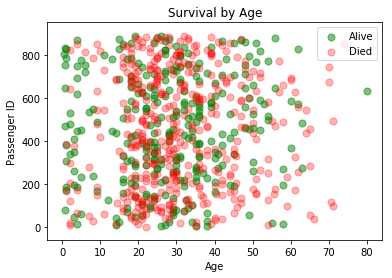

In [131]:
# Distribution plot of Survival by Age
plt.close()
plt.scatter(data=titanic[titanic['Survived'] == 1], x='Age', y='PassengerId', c='green', s=50, alpha=0.5, label='Alive')
plt.scatter(data=titanic[titanic['Survived'] == 0], x='Age', y='PassengerId', c='red', s=50, alpha=0.3, label='Died')
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Passenger ID')
plt.legend()
plt.show()

The above plot is useful to explore the age of the passengers and their survived status. The green circles indicating survived status as alive is predominant for ages 40 and below. We will create a panadas series for age groups 0 to 20, 20+ to 40, 40+ to 60, and 60+ to 80 with values being the probablity of their survival. 

In [132]:
Below20 = (float(titanic[titanic['Age'] <= 20.0]['Survived'].sum())/float(titanic['Survived'].sum()))*100.00
Bet20And40 = (float(titanic[(titanic['Age'] > 20.0) & (titanic['Age'] <= 40.0)]['Survived'].sum())/float(titanic['Survived'].sum()))*100
Bet40And60 = (float(titanic[(titanic['Age'] > 40.0) & (titanic['Age'] <= 60.0)]['Survived'].sum())/float(titanic['Survived'].sum()))*100
Above60 = (float(titanic[titanic['Age'] >= 60.0]['Survived'].sum())/float(titanic['Survived'].sum()))*100
AgeRangeSurvive = pd.Series(data=(Below20, Bet20And40, Bet40And60, Above60),
                            index=('Below 20', 'Between 20 And 40', 'Between 40 And 60', 'Above 60'))
AgeRangeSurvive

Below 20             23.976608
Between 20 And 40    44.736842
Between 40 And 60    14.619883
Above 60              2.046784
dtype: float64

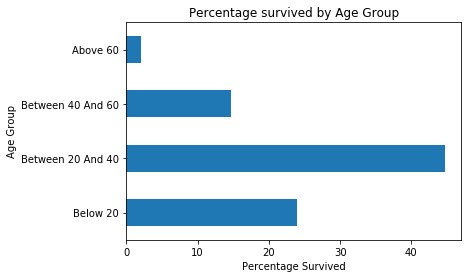

In [133]:
plt.close()
AgeRangeSurvive.plot.barh()
plt.title('Percentage survived by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Percentage Survived')
plt.show()

From the above analysis on age, we can conclude that young passengers of age 40 or less have survived in large numbers than passengers older than 40 years. 

### Combining the features 
Here I combine three independent variables to determine the probability of the dependent variable 'Survival'. 

In [134]:
FemalePClass1EmbC = float(titanic[(titanic['Sex'] == 'female') & (titanic['Pclass'] == 1) & (titanic['Embarked'] == 'C')]['Survived'].sum())
FemalePClass1EmbCTotal = float(titanic[(titanic['Sex'] == 'female') & (titanic['Pclass'] == 1) & (titanic['Embarked'] == 'C')]['Survived'].count())
x = float(FemalePClass1EmbC/FemalePClass1EmbCTotal)*100.00
x = round(x,2)
print('Survival % of female passengers with ticket class#1 and embarked from Cherbourg = {}'.format(x))

Survival % of female passengers with ticket class#1 and embarked from Cherbourg = 97.67


In [135]:
FemalePClass1Age = float(titanic[(titanic['Sex'] == 'female') & (titanic['Pclass'] == 1) & (titanic['Age'] <= 40)]['Survived'].sum())
FemalePClass1AgeTotal = float(titanic[(titanic['Sex'] == 'female') & (titanic['Pclass'] == 1) & (titanic['Age'] <= 40)]['Survived'].count())
y = float(FemalePClass1Age/FemalePClass1AgeTotal)*100.00
y = round(y,2)
print('Survival % of female passengers with ticket class#1 and are less than or equal to 40 years of age = {}'.format(y))

Survival % of female passengers with ticket class#1 and are less than or equal to 40 years of age = 96.61


# Conclusion 
As shown in this descriptive analysis, the survival changes of a passenger are high with following features:   

1) being a female, and    
2) under the age of 40, and either  
3) passenger of class type 1 (or),  
4) embarked at station C 

The future research of this analysis would be train a predictive model using a machine learning algorithm such as random forest. This trained model can applied to a new pool of passengers to predict their survival changes in the event of disaster like Titanic. 
